<a href="https://colab.research.google.com/github/IamJac/MachineLearningAlgorithms/blob/main/TitanicPrediction77.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOADING DATA FROM DRIVE**

In [ ]:
from google.colab import files
file1 = files.upload()
file2 = files.upload()

Saving train.csv to train (1).csv


Saving test.csv to test (1).csv


**CONVERTING THE DATA INTO DATAFRAMES**

In [ ]:
import pandas as pd
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

**EXPLORATORY DATA ANALYSIS**

A LOOK AT THE TESTING DATA

In [ ]:

df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print("Duplicated names")
print(df2['Name'].duplicated().sum())
testing_data=df2.drop(['PassengerId','Ticket','Cabin'],axis=1)
print("Testing Data")
print(testing_data.head())
print(testing_data.nunique().sum())
print("Missing Values")
print(testing_data.isnull().sum())

Duplicated names
0
Testing Data
   Pclass                                          Name     Sex   Age  SibSp  \
0       3                              Kelly, Mr. James    male  34.5      0   
1       3              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2       2                     Myles, Mr. Thomas Francis    male  62.0      0   
3       3                              Wirz, Mr. Albert    male  27.0      0   
4       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   

   Parch     Fare Embarked  
0      0   7.8292        Q  
1      0   7.0000        S  
2      0   9.6875        Q  
3      0   8.6625        S  
4      1  12.2875        S  
689
Missing Values
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


A LOOK AT THE TRAINING DATA

In [ ]:
print("Duplicated names")
print(df1['Name'].duplicated().sum())
training_data=df1.drop(['PassengerId','Survived','Ticket','Cabin'],axis=1)
training_targets=df1['Survived']
print("Training Data")
print(training_data.head())
print("Unique elements")
print(training_data.nunique())
print("Missing Values")
print(training_data.isnull().sum())


Duplicated names
0
Training Data
   Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch     Fare Embarked  
0      1      0   7.2500        S  
1      1      0  71.2833        C  
2      0      0   7.9250        S  
3      1      0  53.1000        S  
4      0      0   8.0500        S  
Unique elements
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64
Missing Values
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          

FURTHER DATA ANALYSIS

In [ ]:
print("Training Data")
print(training_data.describe())

Training Data
           Pclass         Age       SibSp       Parch        Fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    7.910400
50%      3.000000   28.000000    0.000000    0.000000   14.454200
75%      3.000000   38.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
data=training_data.copy()
data_analysis=data.drop(['Name'],axis=1)
print(data_analysis.head())
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_analysis['Sex']=le.fit_transform(data_analysis['Sex'])
data_analysis['Embarked']=le.fit_transform(data_analysis['Embarked'])
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=20, random_state=42)
data_analysis=pd.DataFrame(imp.fit_transform(data_analysis),columns=data_analysis.columns)
data_analysis['Age']=data_analysis['Age'].clip(lower=0.0,upper=80.001)
data_analysis['Fare']=data_analysis['Fare'].clip(lower=0.0,upper=513.0)
print(data_analysis.isnull().sum())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [ ]:
data_analysis.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.131900,-0.406155,0.083081,0.018443,-0.549500,0.157112
Sex,0.131900,1.000000,0.113285,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.406155,0.113285,1.000000,-0.362125,-0.216017,0.095937,-0.009292
SibSp,0.083081,-0.114631,-0.362125,1.000000,0.414838,0.159651,0.066654
Parch,0.018443,-0.245489,-0.216017,0.414838,1.000000,0.216225,0.038322
Fare,-0.549500,-0.182333,0.095937,0.159651,0.216225,1.000000,-0.221226
Embarked,0.157112,0.104057,-0.009292,0.066654,0.038322,-0.221226,1.000000


In [ ]:
data_analysis.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.268028,0.523008,0.381594,32.204208,1.538721
std,0.836071,0.477990,13.547448,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


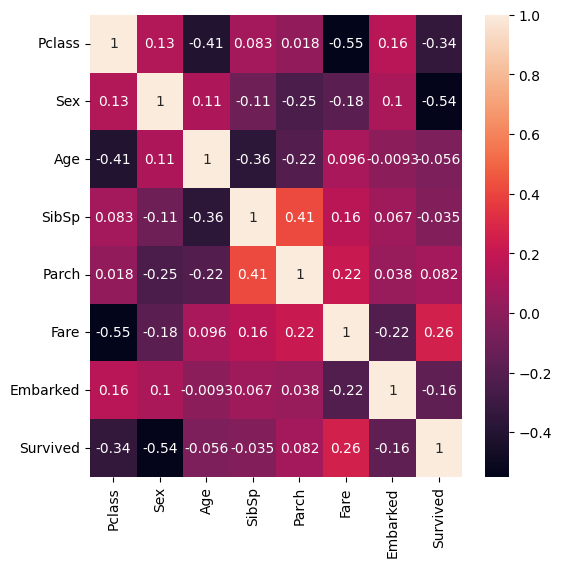

In [ ]:
data_analysis1=data_analysis.copy()
data_analysis1['Survived']=df1['Survived']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.heatmap(data_analysis1.corr(),annot=True)
plt.show()

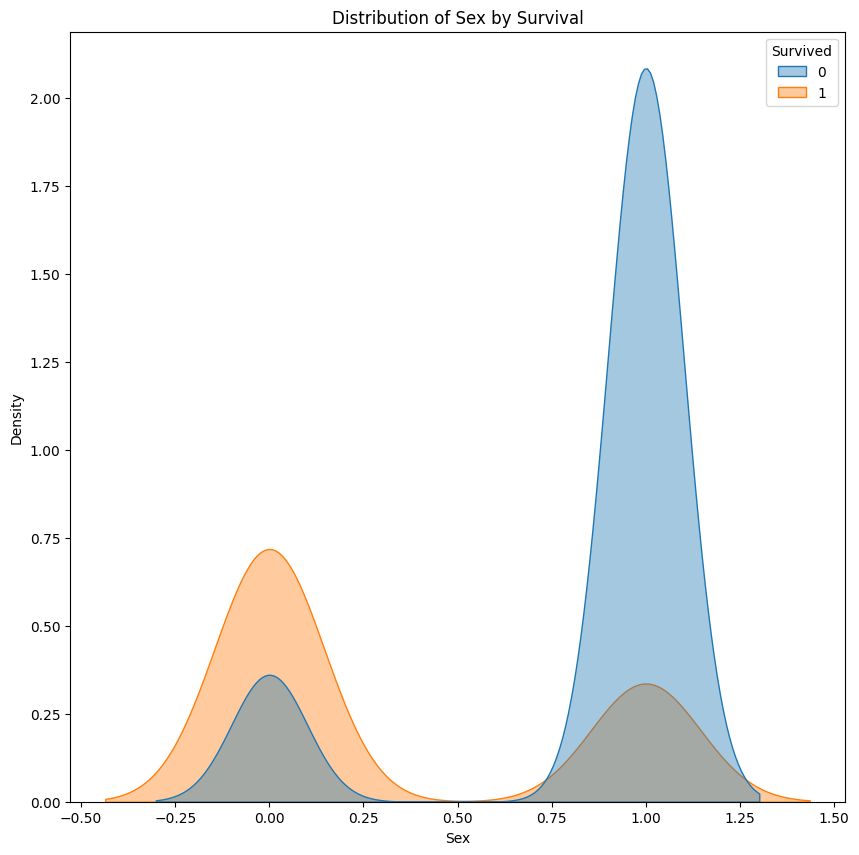

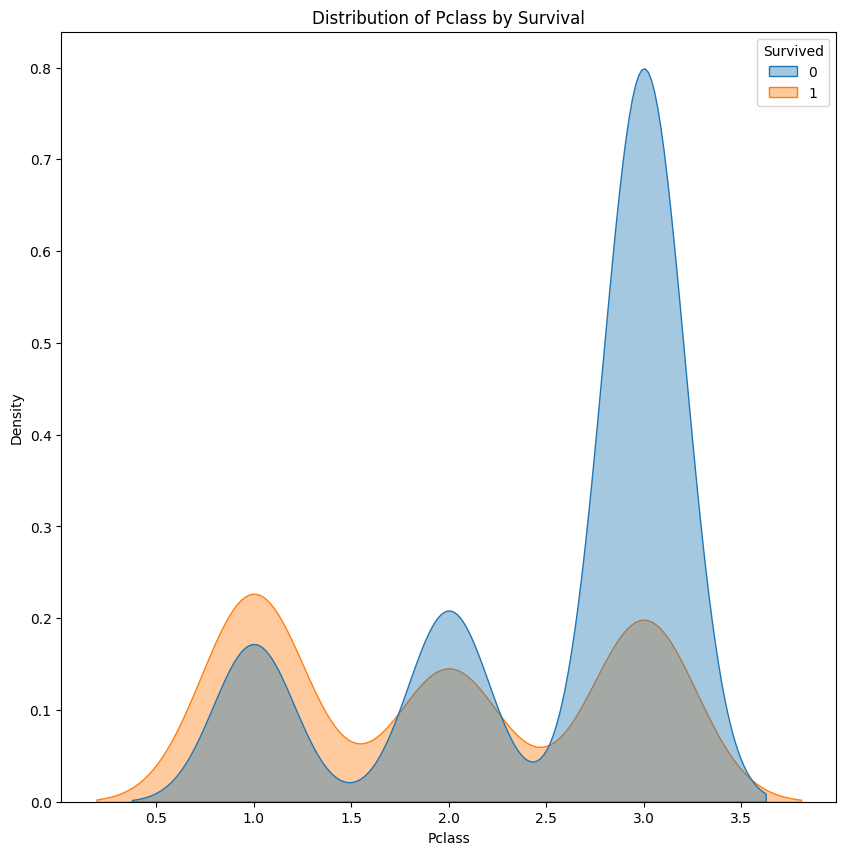

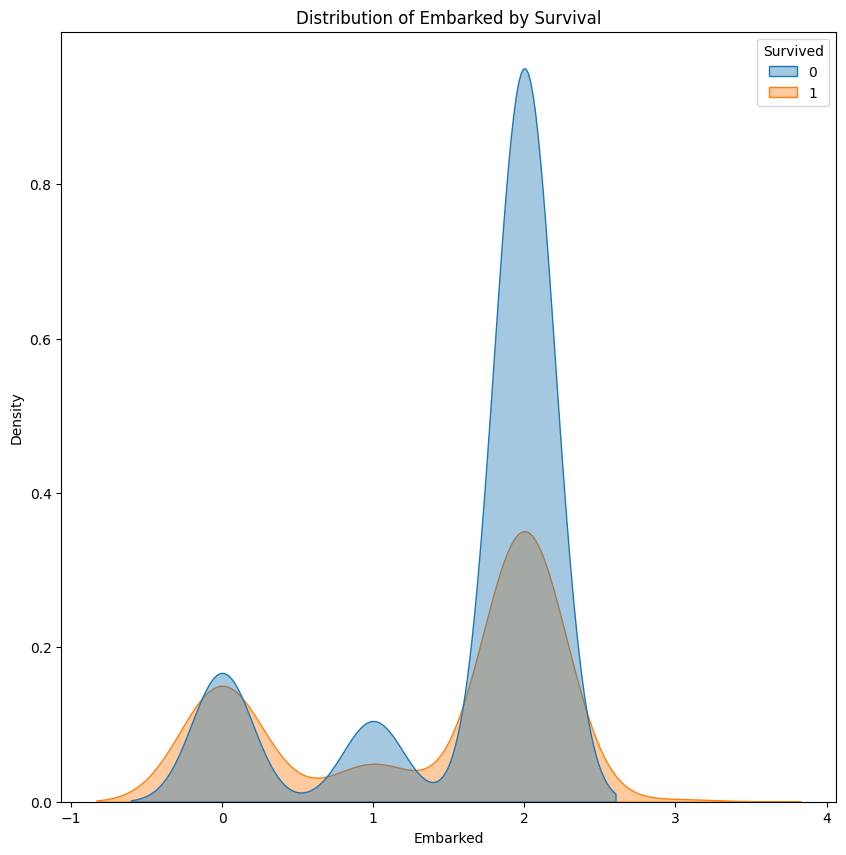

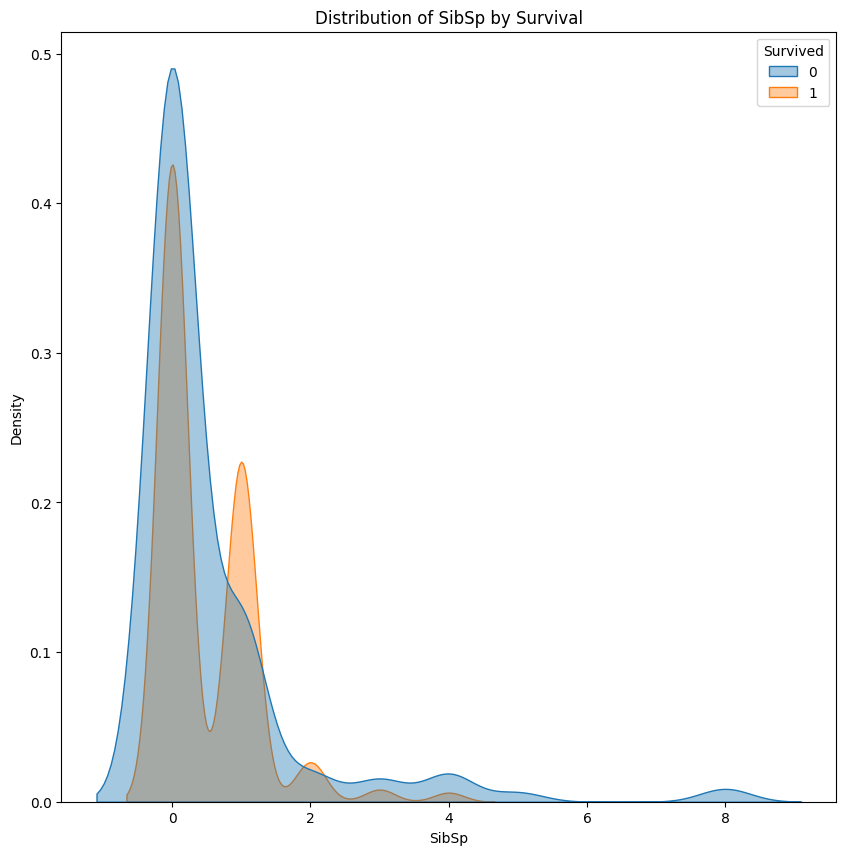

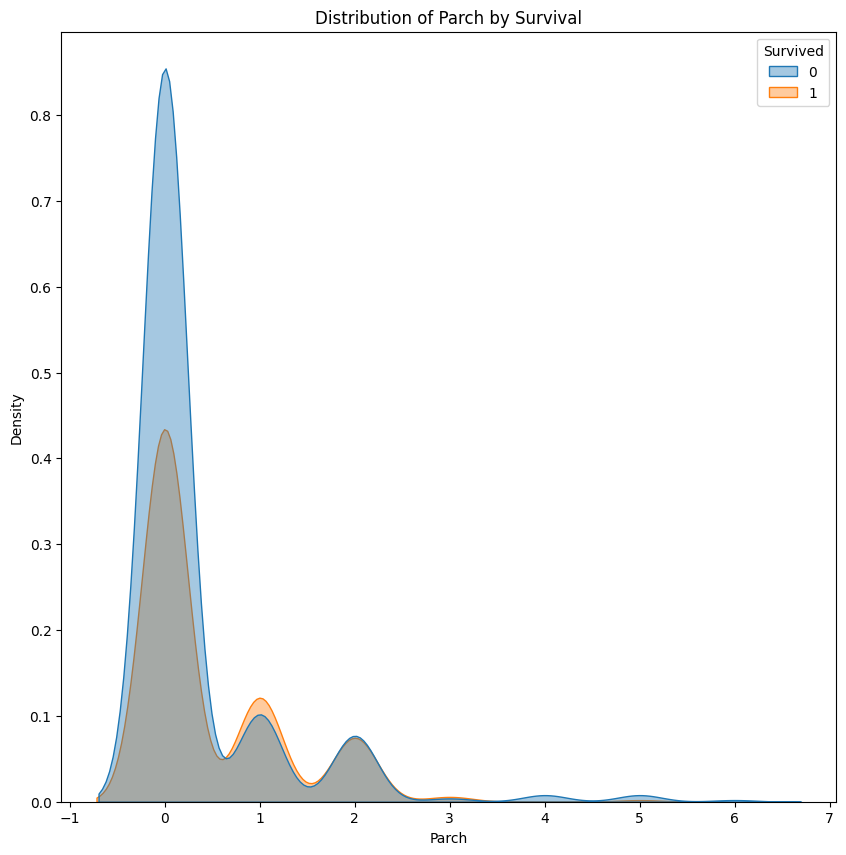

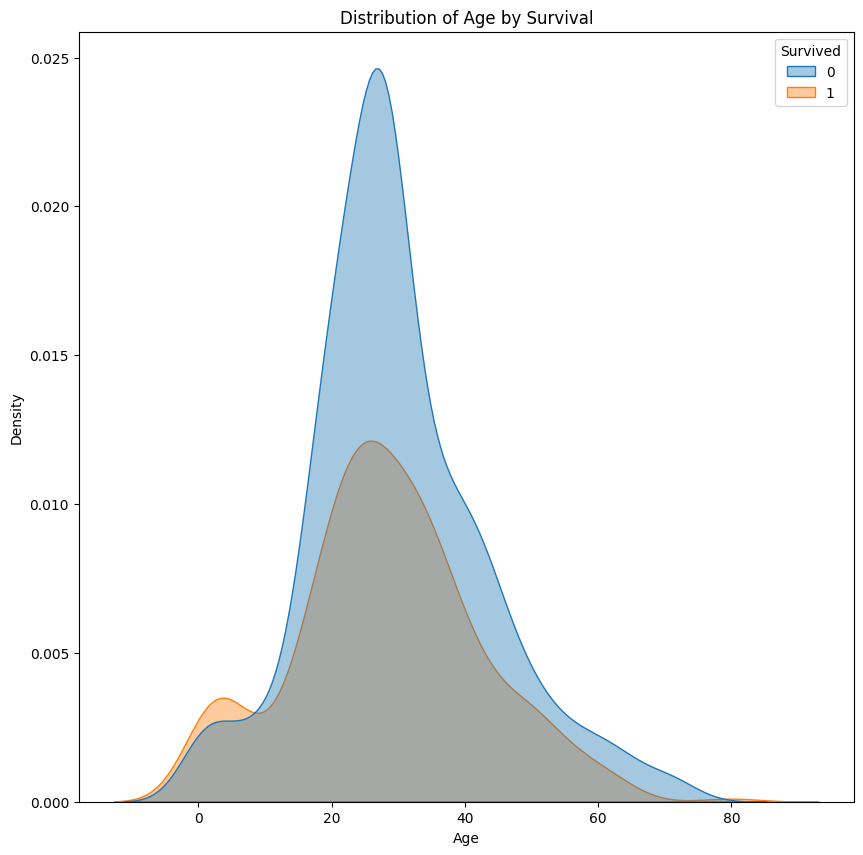

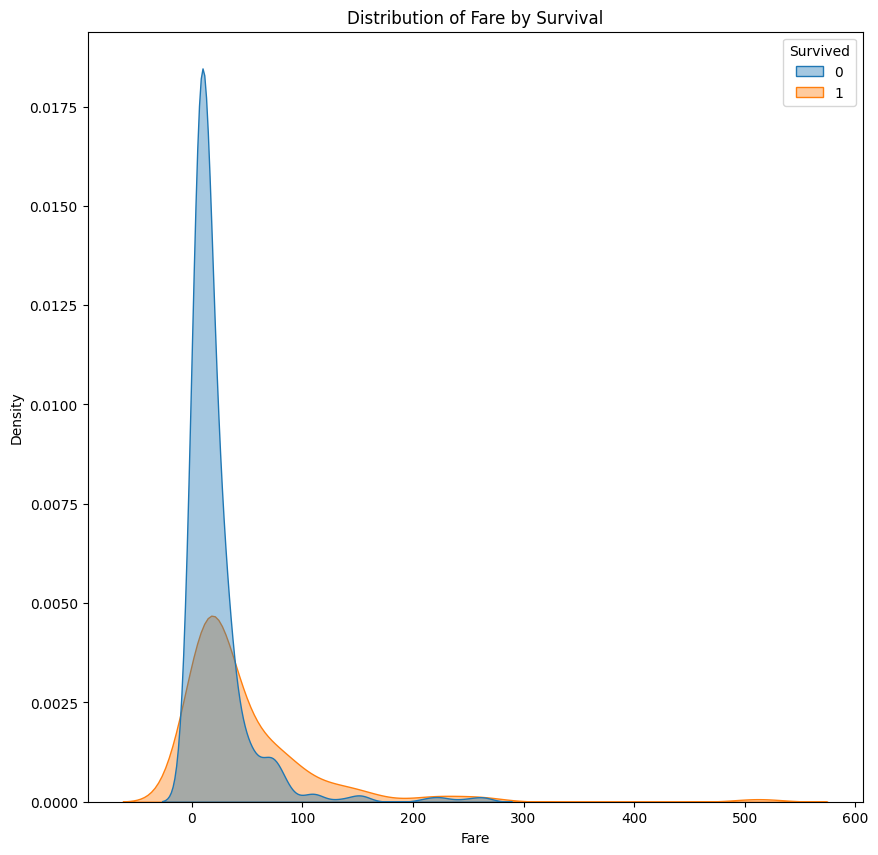

In [ ]:
features_to_plot=['Sex','Pclass','Embarked','SibSp','Parch','Age','Fare']
for feature in features_to_plot:
  if feature=='Age' or 'Fare':
    plt.figure(figsize=(10,10))
  else:
    plt.figure(figsize=(6,6))

  sns.kdeplot(data=data_analysis1,x=feature,hue='Survived',fill=True,alpha=0.4)
  plt.title(f'Distribution of {feature} by Survival')
  plt.xlabel(feature)
  plt.show()

SUMMARY OF THE DATA ANALYSIS

1-Females had a higher chance of survival than males.

2-First class passengers had a higher chance of survival.

3-Passengers from Southampton(S-label_encoded as 2) had a higher chance of dying.

4-Passengers who had either 1 sibling or 1 spouse had a higher chance of survival.

5-Passengers with many siblings or spouses had a higher chance of dying.

6-Passengers with 1 child or parent had a higher chance of survival.

7-Passengers who paid above 42.5 had a higher chance off survival.

6-Passengers with age below 8.2 years had a higher chance of survival.

**DATA PREPROCESSING**

In [ ]:
def num_column_transform(X_numpy_array):
  df= pd.DataFrame(X_numpy_array,columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
  #creating age bins
  df['Age'] = df['Age'].astype(float)
  age_bins=[0.0,12,18.0,35.0,60.0,90.0]
  age_labels=['Child','Teenager','Adult','Senior','Old']
  df['Age_labels']=pd.cut(df['Age'],bins=age_bins,labels=age_labels,right=False,include_lowest=True)
  label_encoder1=LabelEncoder()
  df['Age_labels']=label_encoder1.fit_transform(df['Age_labels'])
  #creating fare bins
  df['Fare'] = df['Fare'].astype(float)
  fare_bins=[0.0,10.0,42.0,285.0,512.0]
  fare_labels=['Low','Medium','High','Very high']
  df['Fare_labels']=pd.cut(df['Fare'],bins=fare_bins,labels=fare_labels,right=False,include_lowest=True)
  label_encoder2=LabelEncoder()
  df['Fare_labels']=label_encoder2.fit_transform(df['Fare_labels'])
  df['Family_size']=df['SibSp']+df['Parch'] + 1
  #df.drop(['Age','Fare'],axis=1,inplace=True)
  df.drop(['SibSp','Parch'],axis=1,inplace=True)
  return df.to_numpy()

In [ ]:
def cat_column_manipulator(X):
  from sklearn.preprocessing import LabelEncoder
  df1= pd.DataFrame(X, columns=['Name', 'Sex','Embarked'])
  df1['Title']= df1['Name'].str.extract('([A-Za-z]+)\.', expand=True)
  label_encoder3=LabelEncoder()
  df1['Title']=label_encoder3.fit_transform(df1['Title'])
  label_encoder5=LabelEncoder()
  df1['Embarked']=label_encoder5.fit_transform(df1['Embarked'])
  label_encoder6=LabelEncoder()
  df1['Sex']=label_encoder6.fit_transform(df1['Sex'])
  df1.drop(['Name'],axis=1,inplace=True)
  return df1.to_numpy()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

numerical_columns=training_data.select_dtypes(include=['int64','float64']).columns
categorical_columns=training_data.select_dtypes(include=['object']).columns

numerical_transformer=Pipeline(steps=[
                                      ('MICE imputer',IterativeImputer(max_iter=10,random_state=42)),
                                      ('num_col_transform',FunctionTransformer(num_column_transform,validate=False)),
                                      ('scaler',StandardScaler())
                              ])

categorical_transformer=Pipeline(steps=[
                                        ('cat_imputer',SimpleImputer(strategy='most_frequent')),
                                        ('cat_col_transform',FunctionTransformer(cat_column_manipulator,validate=False))
                                ])

preprocessor=ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_columns),
    ('cat',categorical_transformer,categorical_columns)
])
x_train,x_test,y_train,y_test=train_test_split(training_data,training_targets,test_size=0.2,random_state=42)

print("X_train")
print(x_train.head())
print("X_test")
print(x_test.head())
print("Y_train")
print(y_train.head())
print("Y_test")
print(y_test.head())

X_train
     Pclass                                Name     Sex   Age  SibSp  Parch  \
331       1                 Partner, Mr. Austen    male  45.5      0      0   
733       2          Berriman, Mr. William John    male  23.0      0      0   
382       3                  Tikkanen, Mr. Juho    male  32.0      0      0   
704       3             Hansen, Mr. Henrik Juul    male  26.0      1      0   
813       3  Andersson, Miss. Ebba Iris Alfrida  female   6.0      4      2   

        Fare Embarked  
331  28.5000        S  
733  13.0000        S  
382   7.9250        S  
704   7.8542        S  
813  31.2750        S  
X_test
     Pclass                                               Name     Sex   Age  \
709       3  Moubarek, Master. Halim Gonios ("William George")    male   NaN   
439       2             Kvillner, Mr. Johan Henrik Johannesson    male  31.0   
840       3                        Alhomaki, Mr. Ilmari Rudolf    male  20.0   
720       2                  Harper, Miss. Ann

**MODEL AND HYPERPARAMETER GRID**

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform,randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

models_configurations={
    'Random Forest':{
                     'model':RandomForestClassifier(random_state=0),
                     'params':{
                              'model__n_estimators':randint(100,600),
                              'model__max_depth':randint(1,10),
                              'model__min_samples_split':randint(2,10),
                              'model__min_samples_leaf':randint(1,10),
                              'model__criterion':['gini','entropy'],
                              'model__max_features':['sqrt','log2'],
                              'model__ccp_alpha':uniform(0.001,0.1),
                              'model__min_impurity_decrease':uniform(0.01,0.1),
                              'model__random_state':randint(1,10)
        }
                   },
    'Logistic Regression':{
                           'model':LogisticRegression(random_state=0),
                           'params':{
                                     'model__C':uniform(0.001,1.0),
                                     'model__penalty':['elasticnet'],
                                     'model__solver':['saga'],
                                     'model__l1_ratio': uniform(0.1, 0.9),
                                     'model__tol':uniform(0.0001,0.1),
                                     'model__fit_intercept':[True,False],
                                     'model__intercept_scaling':[1,2,3],
                                     'model__max_iter':randint(100,2000),
                                    }
                          },
    'Support Vector Machine':{
                              'model':SVC(random_state=0,max_iter=10000),
                              'params':{
                                         'model__C':uniform(0.001,1.0),
                                         'model__kernel':['linear','poly','rbf','sigmoid'],
                                         'model__degree':randint(1,5),
                                         'model__coef0':uniform(0.0,1.0),
                                         'model__tol':uniform(0.0001,0.1)
                                        }
                              },
    'K-Nearest Neighbors':{
                           'model':KNeighborsClassifier(),
                           'params':{
                                     'model__n_neighbors':randint(1,10),
                                     'model__weights':['uniform','distance'],
                                     'model__algorithm':['ball_tree','kd_tree','brute'],
                                     'model__leaf_size':randint(10,50),
                                     'model__metric':['minkowski','manhattan','euclidean','chebyshev']
                                    }
                         },
    'Decision Tree':{
                     'model':DecisionTreeClassifier(random_state=0),
                     'params':{
                               'model__max_depth':randint(1,10),
                               'model__min_samples_split':randint(2,10),
                               'model__min_samples_leaf':randint(1,10),
                               'model__criterion':['gini','entropy'],
                               'model__splitter':['best','random'],
                               'model__max_features':['sqrt','log2'],
                               'model__ccp_alpha':uniform(0.001,0.1),
                               'model__max_leaf_nodes':randint(10,100),
                               'model__min_impurity_decrease':uniform(0.001,0.1),
                               'model__min_weight_fraction_leaf':uniform(0.001,0.1)

                               }
                     },
    'Gradient Boosting':{
                         'model':GradientBoostingClassifier(random_state=0),
                         'params':{
                                   'model__n_estimators':randint(100,700),
                                   'model__learning_rate':uniform(0.001,1.0),
                                   'model__max_depth':randint(1,10),
                                   'model__min_samples_split':randint(2,10),
                                   'model__min_samples_leaf':randint(1,10),
                                   'model__subsample':uniform(0.1,0.9),
                                   'model__max_features':['sqrt','log2'],
                                   'model__ccp_alpha':uniform(0.001,0.1),
                                   'model__validation_fraction':uniform(0.1,0.3),
                                   'model__n_iter_no_change':randint(10,100)
                                 }
                       },
    'xgboost':{
               'model':XGBClassifier(random_state=0),
               'params':{
                         'model__n_estimators':randint(100,700),
                         'model__learning_rate':uniform(0.001,1.0),
                         'model__max_depth':randint(1,10),
                         'model__min_child_weight':randint(1,10),
                         'model__gamma':uniform(0.001,0.9),
                         'model__subsample':uniform(0.1,0.9),
                         'model__colsample_bytree':uniform(0.1,0.9),
                         'model__reg_alpha':uniform(0.001,0.9),
                         'model__reg_lambda':uniform(0.001,0.9)

                        }
               },
    'MLP':{
            'model':MLPClassifier(random_state=0),
            'params':{
                      'model__hidden_layer_sizes':[(50,50,50),(50,100,50),(100,)],
                      'model__activation':['identity','logistic','tanh','relu'],
                      'model__solver':['lbfgs','sgd','adam'],
                      'model__alpha':uniform(0.0001,0.9),
                      'model__learning_rate':['constant','invscaling','adaptive'],
                      'model__learning_rate_init':uniform(0.0001,0.1),
                      'model__max_iter':randint(100,5000),
                      'model__tol':uniform(0.0001,0.1),
                      'model__early_stopping':[True],
                      'model__validation_fraction':uniform(0.001,0.1),
                      'model__n_iter_no_change':randint(10,100)
                    }
          },
    'Naive Bayes':{
                   'model':GaussianNB(),
                   'params':{
                             'model__var_smoothing':uniform(0.0001,0.1)
                             }
                   }
    }

**MODEL AND HYPERPARAMETER TUNING**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,make_scorer
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,KFold
import numpy as np

kf=KFold(n_splits=5,shuffle=True,random_state=42)

precision_scorer=make_scorer(precision_score)
recall_scorer=make_scorer(recall_score)
f1_scorer=make_scorer(f1_score)

best_model=None
best_score=0
results={}

for model_name,config in models_configurations.items():
  print(f'Tuning: {model_name}...')
  pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',config['model'])])

  random_search=RandomizedSearchCV(pipeline,config['params'],n_iter=10,cv=kf,scoring='f1',n_jobs=-1,error_score='raise',verbose=2)
  random_search.fit(x_train,y_train)

  precision_scores=cross_val_score(random_search.best_estimator_,x_train,y_train,cv=kf,scoring=precision_scorer)
  recall_scores=cross_val_score(random_search.best_estimator_,x_train,y_train,cv=kf,scoring=recall_scorer)
  f1_scores=cross_val_score(random_search.best_estimator_,x_train,y_train,cv=kf,scoring=f1_scorer)
  accuracy_scores=cross_val_score(random_search.best_estimator_,x_train,y_train,cv=kf,scoring='accuracy')

  precision_mean=np.mean(precision_scores)
  recall_mean=np.mean(recall_scores)
  f1_mean=np.mean(f1_scores)
  accuracy_mean=np.mean(accuracy_scores)
  accuracy_std=np.std(accuracy_scores)

  combined_score=(precision_mean+recall_mean+f1_mean+accuracy_mean-accuracy_std)/4

  results[model_name]={
                        'best_params':random_search.best_params_,
                        'accuracy_mean':accuracy_mean,
                        'accuracy_std':accuracy_std,
                        'precision_mean':precision_mean,
                        'recall_mean':recall_mean,
                        'f1_mean':f1_mean,
                        'combined_score':combined_score
                      }
  print(f'Best Params: {random_search.best_params_}')
  print(f'Accuracy Mean: {accuracy_mean}')
  print(f'Accuracy Std: {accuracy_std}')
  print(f'Precision Mean: {precision_mean}')
  print(f'Recall Mean: {recall_mean}')
  print(f'F1 Mean: {f1_mean}')
  print(f'Combined Score: {combined_score}')

  if combined_score>best_score:
    best_score=combined_score
    best_model=random_search.best_estimator_

for model_name,metrics in results.items():
  print(f'Model: {model_name}:{metrics}')


Tuning: Random Forest...
Best Params: {'model__ccp_alpha': 0.03327443992607874, 'model__criterion': 'entropy', 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_impurity_decrease': 0.03192537619550461, 'model__min_samples_leaf': 8, 'model__min_samples_split': 2, 'model__n_estimators': 277, 'model__random_state': 3}
Accuracy Mean: 0.7977543583177387
Accuracy Std: 0.0240750838725776
Precision Mean: 0.771799520422189
Recall Mean: 0.6641329609229526
F1 Mean: 0.7101215705847602
Combined Score: 0.7299333315937658
Tuning: Logistic Regression...
Best Params: {'model__C': 0.3215631247975991, 'model__fit_intercept': True, 'model__intercept_scaling': 3, 'model__l1_ratio': 0.35621944123341465, 'model__max_iter': 706, 'model__penalty': 'elasticnet', 'model__solver': 'saga', 'model__tol': 0.015087122281609421}
Accuracy Mean: 0.8117797695262483
Accuracy Std: 0.025774166859293964
Precision Mean: 0.8066937213909954
Recall Mean: 0.6563753011185333
F1 Mean: 0.7217520776658537
Combined Sco

In [ ]:
print(f'Best Model: {best_model}')
print(f'Best Score: {best_score}')

Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('MICE '
                                                                   'imputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('num_col_transform',
                                                                   FunctionTransformer(func=<function num_column_transform at 0x7e04811d45e0>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[..

**ASSESSING THE MODEL**

EVALUATING THE MODEL ON VALIDATION DATA

In [ ]:
y_pred= best_model.predict(x_test)
print("ACCURACY SCORE = ",(accuracy_score(y_test, y_pred))*100,"%")
print()
print("CONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred))
print()
print("CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred))

ACCURACY SCORE =  82.12290502793296 %

CONFUSION MATRIX
[[95 10]
 [22 52]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



EVALUATING THE MODEL ON WHOLE TRAINING DATA

In [ ]:
pred= best_model.predict(training_data)
print("ACCURACY SCORE = ",(accuracy_score(training_targets, pred))*100,"%")
print()
print("CONFUSION MATRIX")
print(confusion_matrix(training_targets, pred))
print()
print("CLASSIFICATION REPORT")
print(classification_report(training_targets, pred))
preds1=pd.DataFrame({"Actual":training_targets,"Predicted":pred})
preds1.loc[10:15]

ACCURACY SCORE =  80.8080808080808 %

CONFUSION MATRIX
[[480  69]
 [102 240]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       549
           1       0.78      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



,Actual,Predicted
10,1,1
11,1,1
12,0,0
13,0,0
14,0,1
15,1,1


PREDICTIONS BASED ON THE TEST DATA

In [ ]:
testing_preds= best_model.predict(testing_data)
print(testing_preds)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
preds2=pd.DataFrame({"PassengerId":df2['PassengerId'],"Survived":testing_preds})
preds2.to_csv('sub31.csv', index=False)

In [ ]:
files.download("sub31.csv")
print("SUCCESSFUL")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SUCCESSFUL
